In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv("RAW_global_confirmed_cases.csv")
df1 = pd.read_csv("RAW_global_deaths.csv")

In [4]:
df.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
df1.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In both the datasets Provinces/State data is unavailable, so lets drop it

In [6]:
df = df.drop(columns='Province/State')
df1 = df1.drop(columns='Province/State')

In [7]:
df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [8]:
print(df.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1146 entries, Country/Region to 3/9/23
dtypes: float64(2), int64(1143), object(1)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1146 entries, Country/Region to 3/9/23
dtypes: float64(2), int64(1143), object(1)
memory usage: 2.5+ MB
None


In [9]:
na = df.isna()
print(na.sum())

Country/Region    0
Lat               2
Long              2
1/22/20           0
1/23/20           0
                 ..
3/5/23            0
3/6/23            0
3/7/23            0
3/8/23            0
3/9/23            0
Length: 1146, dtype: int64


In [10]:
na1 = df1.isna()
print(na1.sum())

Country/Region    0
Lat               2
Long              2
1/22/20           0
1/23/20           0
                 ..
3/5/23            0
3/6/23            0
3/7/23            0
3/8/23            0
3/9/23            0
Length: 1146, dtype: int64


In [11]:
df = df.dropna()
df1 = df1.dropna()

Data Cleaned, onto the data visualisation part

In [12]:
import plotly.express as px
import pandas as pd

# Choose the date column for visualization
date_column = '3/9/23'  # Replace with the specific date you want to visualize

# Create a Plotly choropleth map
fig = px.choropleth(df, 
                    locations='Country/Region',
                    locationmode='country names',
                    color=date_column,
                    color_continuous_scale="YlOrRd",
                    title=f'COVID-19 Case Density on {date_column}',
                    hover_name='Country/Region',
                    projection='natural earth')

# Show the map
fig.show()


In [13]:
import plotly.express as px
import pandas as pd

# Choose the date column for visualization
date_column = '3/9/23'  # Replace with the specific date you want to visualize

# Create a Plotly choropleth map
fig = px.choropleth(df1, 
                    locations='Country/Region',
                    locationmode='country names',
                    color=date_column,
                    color_continuous_scale="YlOrRd",
                    title=f'COVID-19 Case Density on {date_column}',
                    hover_name='Country/Region',
                    projection='natural earth')

# Show the map
fig.show()


C:\Users\Kshit\AppData\Local\Temp\ipykernel_16276\374289915.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




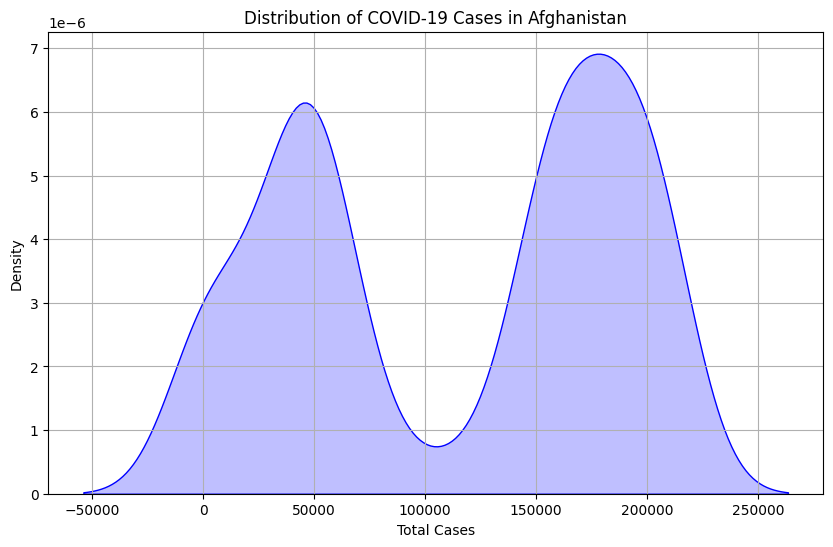

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the country you want to visualize (e.g., Afghanistan)
country_name = "Afghanistan"

# Select the data for the chosen country
afghanistan_data = df[df["Country/Region"] == country_name]

# Extract the daily case counts
case_counts = afghanistan_data.iloc[:, 4:].sum()

# Create a kernel density plot to visualize the distribution of COVID-19 cases in Afghanistan over time
plt.figure(figsize=(10, 6))
sns.kdeplot(case_counts, color='blue', shade=True)
plt.title(f'Distribution of COVID-19 Cases in {country_name}')
plt.xlabel('Total Cases')
plt.ylabel('Density')
plt.grid(True)
plt.show()


C:\Users\Kshit\AppData\Local\Temp\ipykernel_16276\2629870029.py:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




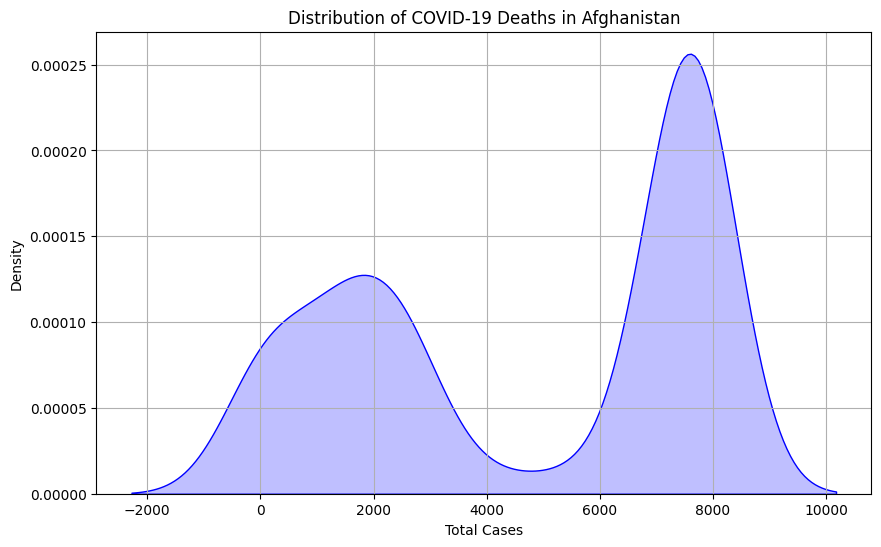

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the country you want to visualize (e.g., Afghanistan)
country_name = "Afghanistan"

# Select the data for the chosen country
afghanistan_data = df1[df1["Country/Region"] == country_name]

# Extract the daily case counts
case_counts = afghanistan_data.iloc[:, 4:].sum()

# Create a kernel density plot to visualize the distribution of COVID-19 cases in Afghanistan over time
plt.figure(figsize=(10, 6))
sns.kdeplot(case_counts, color='blue', shade=True)
plt.title(f'Distribution of COVID-19 Deaths in {country_name}')
plt.xlabel('Total Cases')
plt.ylabel('Density')
plt.grid(True)
plt.show()


Done with Data Visualisation, Onto Algorithms


In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten




In [17]:
afghanistan_data = df[df["Country/Region"] == "Afghanistan"]


In [18]:
afghanistan_data.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451


In [19]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [20]:
afghanistan_data =afghanistan_data.drop(columns=['Country/Region','Lat','Long'])

In [21]:
timeseries_data = afghanistan_data.values.ravel()

In [22]:
n_features = 50

In [23]:
X, y = prepare_data(timeseries_data, n_features)


In [24]:
print(X)

[[     0      0      0 ...      8      8     11]
 [     0      0      0 ...      8     11     11]
 [     0      0      0 ...     11     11     11]
 ...
 [207993 208009 208034 ... 209369 209390 209406]
 [208009 208034 208062 ... 209390 209406 209436]
 [208034 208062 208084 ... 209406 209436 209451]]


In [25]:
print(y)

[    11     11     14 ... 209436 209451 209451]


In [26]:

X = X.reshape((X.shape[0], X.shape[1], 1))

In [29]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import LSTM, Dense
from keras.models import Sequential

# Define a function to create the LSTM model
def create_lstm_model(n_units=50, n_layers=2, learning_rate=0.001, batch_size=32, epochs=30):
    model = Sequential()
    model.add(LSTM(n_units, activation='relu', return_sequences=True, input_shape=(50, 1)))
    for _ in range(n_layers - 1):
        model.add(LSTM(n_units, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Wrap the Keras model as a scikit-learn estimator
estimator = KerasRegressor(build_fn=create_lstm_model)

# Define the hyperparameter search space
param_grid = {
    'n_units': [50, 100, 150],
    'n_layers': [1, 2, 3],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, verbose=1)

# Fit the grid search to your data
grid_result = grid.fit(X, y)

# Print the best hyperparameters and model performance
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\Kshit\AppData\Local\Temp\ipykernel_16276\1092065950.py:17: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 3 folds for each of 81 candidates, totalling 243 fits
3/3 [==============================] - 1s 299ms/step - loss: nan


c:\Users\Kshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

35/35 [==============================] - 6s 135ms/step - loss: 22639505408.0000
Best: -8515529962.666667 using {'batch_size': 32, 'learning_rate': 0.001, 'n_layers': 1, 'n_units': 100}


In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the best hyperparameters obtained from the grid search

n_units = 100
n_layers = 1
learning_rate = 0.001
batch_size = 32

# Create the best LSTM model using the best hyperparameters
best_model = Sequential()

# Add LSTM layers to the model
best_model.add(LSTM(n_units, activation='relu', return_sequences=True, input_shape=(50, 1)))
for _ in range(n_layers - 1):
    best_model.add(LSTM(n_units, activation='relu'))

# Add a dense output layer
best_model.add(Dense(1))

# Compile the model with the best learning rate
best_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')




best_model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
35/35 [==============================] - 12s 272ms/step - loss: 18435153920.0000
Epoch 2/300
35/35 [==============================] - 6s 167ms/step - loss: 20833767424.0000
Epoch 3/300
35/35 [==============================] - 4s 106ms/step - loss: 17165818880.0000
Epoch 4/300
35/35 [==============================] - 4s 107ms/step - loss: 17999466496.0000
Epoch 5/300
35/35 [==============================] - 4s 105ms/step - loss: 14796114944.0000
Epoch 6/300
35/35 [==============================] - 4s 103ms/step - loss: 13794395136.0000
Epoch 7/300
35/35 [==============================] - 4s 103ms/step - loss: 10835044352.0000
Epoch 8/300
35/35 [==============================] - 4s 103ms/step - loss: 14041575424.0000
Epoch 9/300
35/35 [==============================] - 4s 103ms/step - loss: 13117805568.0000
Epoch 10/300
35/35 [==============================] - 4s 106ms/step - loss: 15881163776.0000
Epoch 11/300
35/35 [==============================] - 4s 125ms/step - loss: 29

Prediction for next 10 days

In [38]:
x_input = X[-1]
temp_input = list(x_input)
lst_output = []
i = 0

while i < 10:
    if len(temp_input) >= 50 :
        x_input = np.array(temp_input[-50:]).reshape((1, 50, 1))
        yhat = best_model.predict(x_input, verbose=0)[0][0]

        temp_input.append(yhat)
        lst_output.append(yhat)
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = best_model.predict(x_input, verbose=0)[0][0]

        temp_input.append(yhat)
        lst_output.append(yhat)
        i += 1

print("Predicted Values for the Next 10 Days:", lst_output)


Predicted Values for the Next 10 Days: [array([94838.23], dtype=float32), array([94850.984], dtype=float32), array([94861.01], dtype=float32), array([94861.01], dtype=float32), array([94861.01], dtype=float32), array([94866.93], dtype=float32), array([94954.46], dtype=float32), array([94970.414], dtype=float32), array([94970.414], dtype=float32), array([95019.65], dtype=float32)]


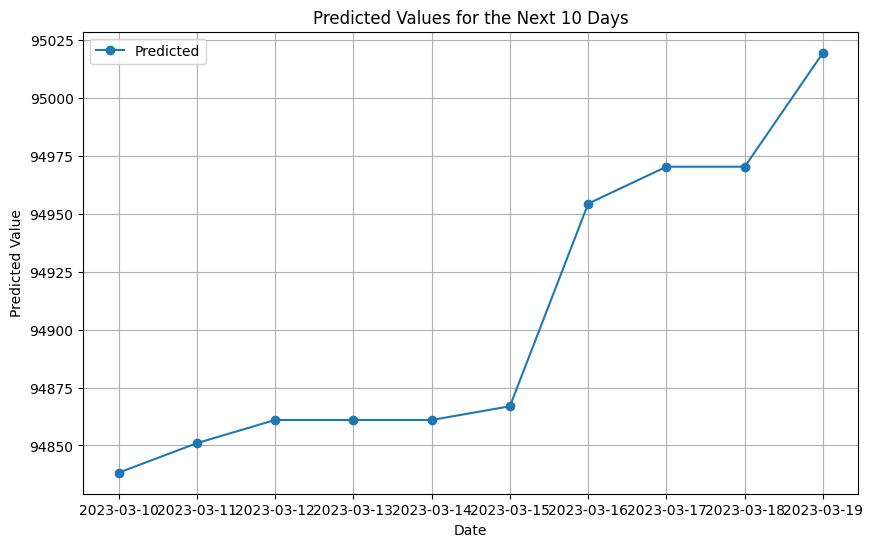

In [39]:
import matplotlib.pyplot as plt

# Predicted values for the next 10 days
predicted_values = lst_output

# Create a date range for the next 10 days (replace with actual dates)
date_range = pd.date_range(start="2023-03-10", periods=10)

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.plot(date_range, predicted_values, marker='o', label="Predicted")
plt.xlabel("Date")
plt.ylabel("Predicted Value")
plt.title("Predicted Values for the Next 10 Days")
plt.legend()
plt.grid()
plt.show()
